<h1>Bank Customer Churn Prediction</h1>

https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

In [ ]:
#Autor: Willy Ferreira
#Data: 28/02/2023

<h3>1. Instalação e importação dos pacotes</h3>

<h4>1.1. Instalação</h4>

In [ ]:
##Processamento e análise de dados
%pip install numpy
##Biblioteca para manipulação de dados
%pip install pandas
##Criação de gráficos interativos 
%pip install plotly
##Criação de gráficos
%pip install matplotlib
##Criação de gráficos
%pip install seaborn
##################################
#Criação de dashboards interativos
#%pip install dash
##Análise rápida de dados
#%pip install pandas_profiling
##Interface gráfica para Jupyter
#%pip install ipywidgets


<h4>1.2. Importação</h4>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot
import seaborn as sns
############################################
#import dash
#from dash import Dash, html, dcc
# 
#from pandas_profiling import ProfileReport
#import ipywidgets

<h3>2. Importação do dataset e demais tratamentos</h3>

In [2]:
df_original = pd.read_csv(
    filepath_or_buffer = 'churn.csv', #arquivo
    sep = ',', #separação dos valores
    header = 0, #o meu arquivo tem um cabeçalho
    )

#mostra os 5 primeiros registros
df_original.head() 

#deletando a coluna RowNumber
df_original.drop(['RowNumber'], axis = 1, inplace = True) #axis 1 = coluna
#ou
#df_original.drop(columns=['RowNumer'], inplace=True)

#mostra os 5 primeiros registros novamente
df_original.head() 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df_original.rename(
    columns={
        'CustomerId': 'Id_Cliente',
        'Surname': 'Nome',
        'CreditScore': 'Score',
        'Geography': 'Nacionalidade',
        'Gender': 'Genero',
        'Age': 'Idade',
        'Tenure':'Tempo_Cliente',
        'Balance': 'Saldo_Conta',
        'NumOfProducts': 'Qtd_Produtos',
        'HasCrCard': 'Cartao',
        'IsActiveMember': 'Cliente_Ativo',
        'EstimatedSalary': 'Salario_Estimado',
        'Exited': 'Churn'
    }
)

df.head()

,Id_Cliente,Nome,Score,Nacionalidade,Genero,Idade,Tempo_Cliente,Saldo_Conta,Qtd_Produtos,Cartao,Cliente_Ativo,Salario_Estimado,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>3. Análise Exploratória</h3>

In [6]:
#Informações sobre o data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_Cliente        10000 non-null  int64  
 1   Nome              10000 non-null  object 
 2   Score             10000 non-null  int64  
 3   Nacionalidade     10000 non-null  object 
 4   Genero            10000 non-null  object 
 5   Idade             10000 non-null  int64  
 6   Tempo_Cliente     10000 non-null  int64  
 7   Saldo_Conta       10000 non-null  float64
 8   Qtd_Produtos      10000 non-null  int64  
 9   Cartao            10000 non-null  int64  
 10  Cliente_Ativo     10000 non-null  int64  
 11  Salario_Estimado  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


3.1. Análise Exploratória - Score de Crédito

In [7]:
df.Score.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64

In [8]:
#Gráfico - Score de Crédito
fig_score = go.Figure()
#Definição do tipo e dos dados do gráfico
fig_score.add_box(x = df['Score'], name = 'Score', orientation = 'h')
#Definições de layout do gráfico
fig_score.update_layout(title = 'Score de Crédito')
fig_score.update_layout(height = 400, width = 600)
fig_score.update_layout(legend_title_text = 'Score de Crédito')

fig_score.show()

#fig_score = px.box(
#   data_frame = df, 
#    x = 'score_de_credito',
#    title = 'Score de Crédito',
#    width = 800,
#    height = 400
#    #,
#    #notched = False,
#    #hover_data = ['churn']
#    )


<Axes: xlabel='Score'>

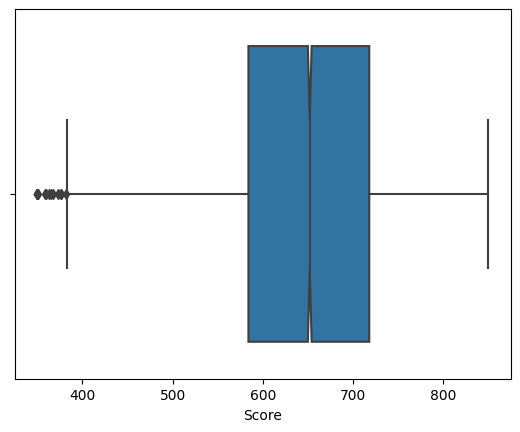

In [21]:
sns.boxplot(
    data = df,
    x = 'Score',
    orient = 'h'
)

In [ ]:
df_pais = df['pais'].count()
df_pais

In [ ]:
df_pais

In [ ]:
#Gráfico - Clientes por país
fig_pais = px.pie(
    data_frame = df, 
    names = 'pais',
    title = 'Clientes por País',
    color = 'pais',
    color_discrete_map = {'France': 'cyan',
                          'Germany': 'royalblue',
                          'Spain': 'darkblue'},
    hole = .4
                )
fig_pais

In [ ]:
df.idade.describe()

In [ ]:
#Gráfico - Idade
fig_idade = px.box(
    data_frame = df, 
    x = 'idade',
    title = 'Idade'
    #,
    #notched = False,
    #hover_data = ['churn']
    )
fig_idade

In [ ]:
df.idade_abertura_cc.describe()

In [ ]:
#Gráfico - Tempo de abertura da conta
fig_idade_abertura_cc= px.box(
    data_frame = df, 
    x = 'idade_abertura_cc',
    title = 'Tempo de abertura da conta'
    )
fig_idade_abertura_cc

In [ ]:
df.saldo_cc.describe()

In [ ]:
#Gráfico - Saldo em Conta Corrente
fig_saldo_cc= px.box(
    data_frame = df, 
    x = 'saldo_cc',
    title = 'Saldo em Conta Corrente'
    )
fig_saldo_cc

In [ ]:
df.qtd_produtos.describe()

In [ ]:
df.qtd_produtos.value_counts()

In [ ]:
#Gráfico - Quantidade de Produtos
fig_qtd_produtos= px.box(
    data_frame = df, 
    x = 'qtd_produtos',
    title = 'Quantidade de Produtos'
    )
fig_qtd_produtos

In [ ]:
#Gráfico - Clientes por quantidade de produtos
fig_qtd_produtos_pie = px.pie(
    data_frame = df, 
    names = 'qtd_produtos',
    title = 'Clientes por quantidade de produtos',
    color = 'qtd_produtos',
    color_discrete_map = {1: 'cyan',
                          2: 'royalblue',
                          3: 'darkblue',
                          4: 'lightblue'},
    hole = .5
                )
fig_qtd_produtos_pie

Correlações

In [ ]:
df_corr = df.corr(method = 'pearson')

In [ ]:
import plotly.graph_objects as go

fig_corr = go.Figure(
    data = go.Heatmap(
        z = df_corr,
        x = df_corr.columns,
        y = df_corr.columns
    )
)

fig_corr.show()

In [ ]:
fig_corr_arred = px.imshow(
    round(df_corr, 2),
    text_auto = True,
    aspect = 'auto'
)

fig_corr_arred.show()

In [ ]:
#profile = ProfileReport(df_bank)
#profile.to_widgets()
#profile.to_file('bank_churn.html')
#profile.to_notebook_iframe()

In [ ]:
df['pais'].unique()
#df_bank['pais'].nunique()

In [ ]:
#ver as colunas do data frame
df.columns
#ver a quantidade de linhas
df.index
#mostrar estatísticas rápidas do data frame
df.describe()
#pivotar o data frame
df.T
#monstrando o data frame ordenado pelas colunas crescentes
df.sort_index(axis = 1, ascending = True)
#mostrando o data frame ordenado por uma coluna
df.sort_values(by = 'churn')
#mostrando 5 primeiras linhas e 2 colunas específicas
df.loc[0:5:, ['ativo', 'idade']]
#mostrar 3 primeiras linhas e todas as colunas
df.iloc[0:3, :]
#mostrar uma posição específica
df.iloc[0]



In [ ]:
app = Dash(__name__)

fig = px.box(data_frame = df, x = 'score_de_credito')

app.layout = html.Div(children = [
        html.H1(children = 'Score de Crédito'),
    
dcc.Graph(id = 'example-graph', figure = fig)
]
)
if __name__ == '__main__':
    app.run_server(debug=True)